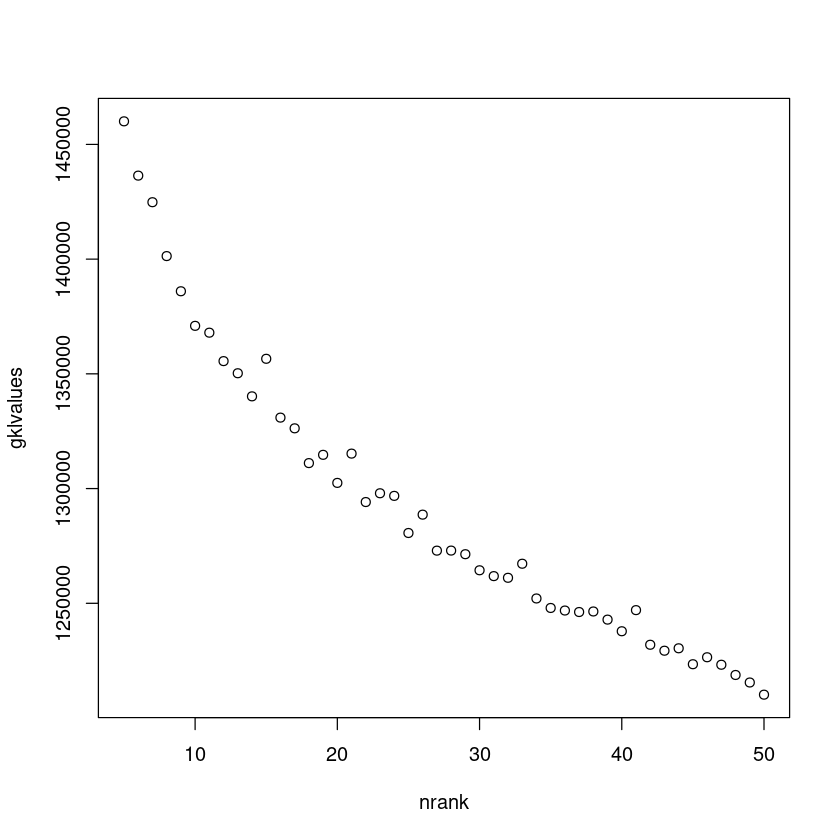

In [2]:
# get the gkl values
gklvalues = c()
i = 1
nrank = c(5:50)
for( x in nrank){
    load(paste0("modelssaved/LH5K_f",x,"_l001.RData"))
    gklvalues[i] = out$gkl
    i = i+1
}

plot(nrank,gklvalues)


# Spatial NMF

In [3]:


location = read.csv('data/LH_location.csv')
location = location[,-1]
location = as.matrix(location)

library(ggplot2)

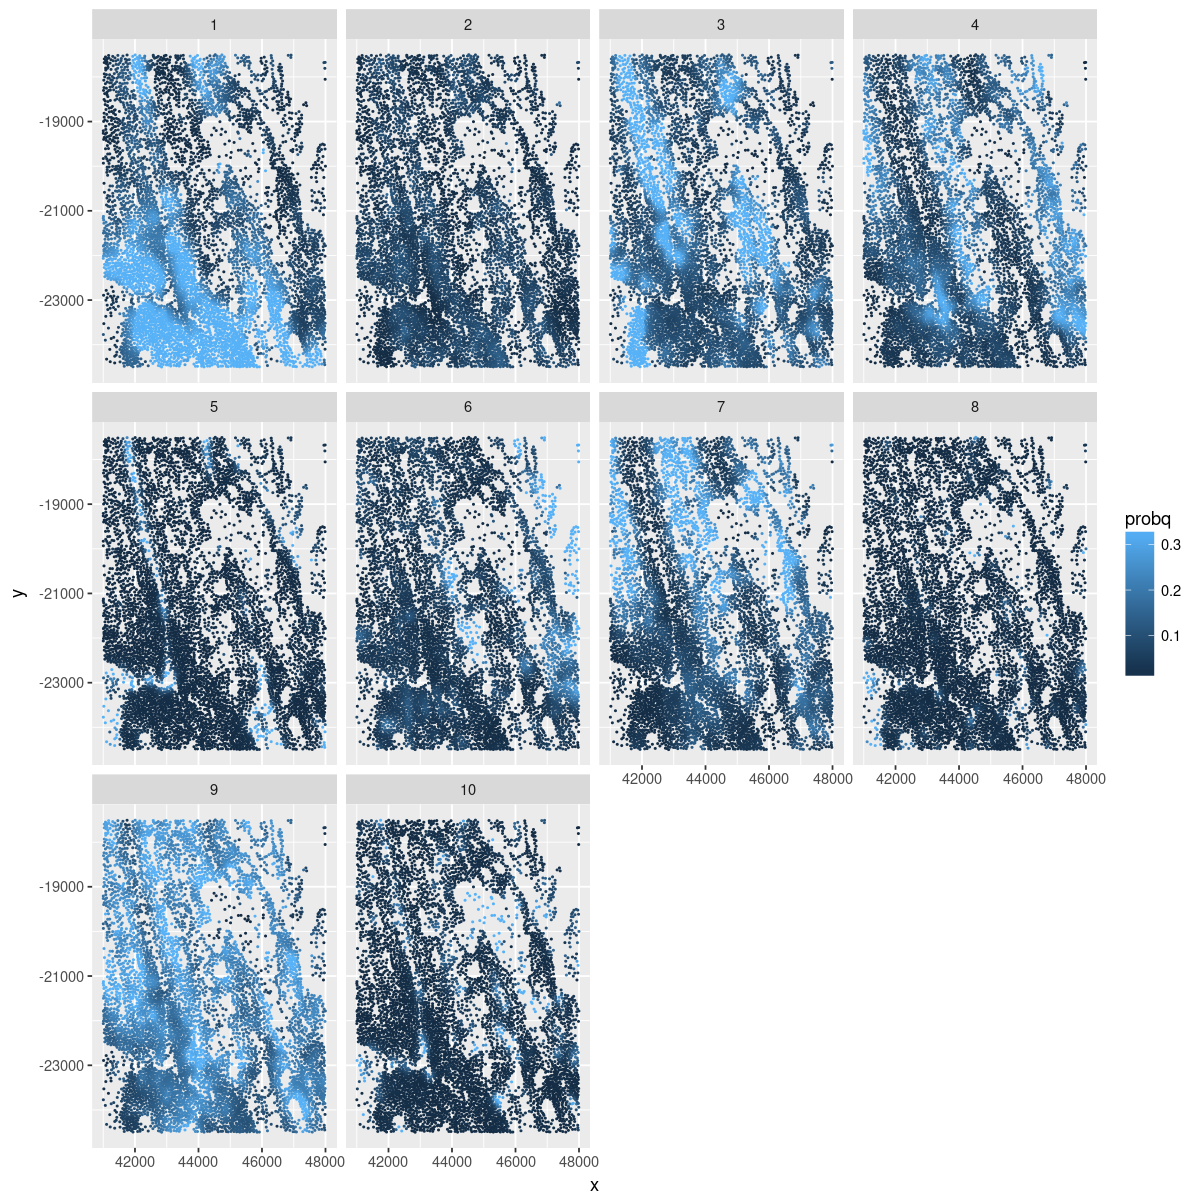

In [4]:
plotfactors = function(location,exposures){
        plotdat = data.frame(x = location[,1], y = location[,2], all = exposures/rowSums(exposures))

        datalong = reshape(plotdat, varying = colnames(plotdat)[-c(1,2)], direction = 'long', v.names = "prob")
        options(repr.plot.width=10, repr.plot.height=10)
        datalong$probq = datalong$prob
        qmax = quantile(datalong$probq, 0.95)
        datalong$probq[datalong$prob > qmax] = qmax


        g1 = ggplot(datalong, aes(x = x, y = y, col = probq))+
        geom_point(cex = 0.2)+ 
        facet_wrap(~time)
        
        return(g1)

}

load("modelssaved/LH5K_f10_l001.RData")

plotfactors(location,out$exposures)

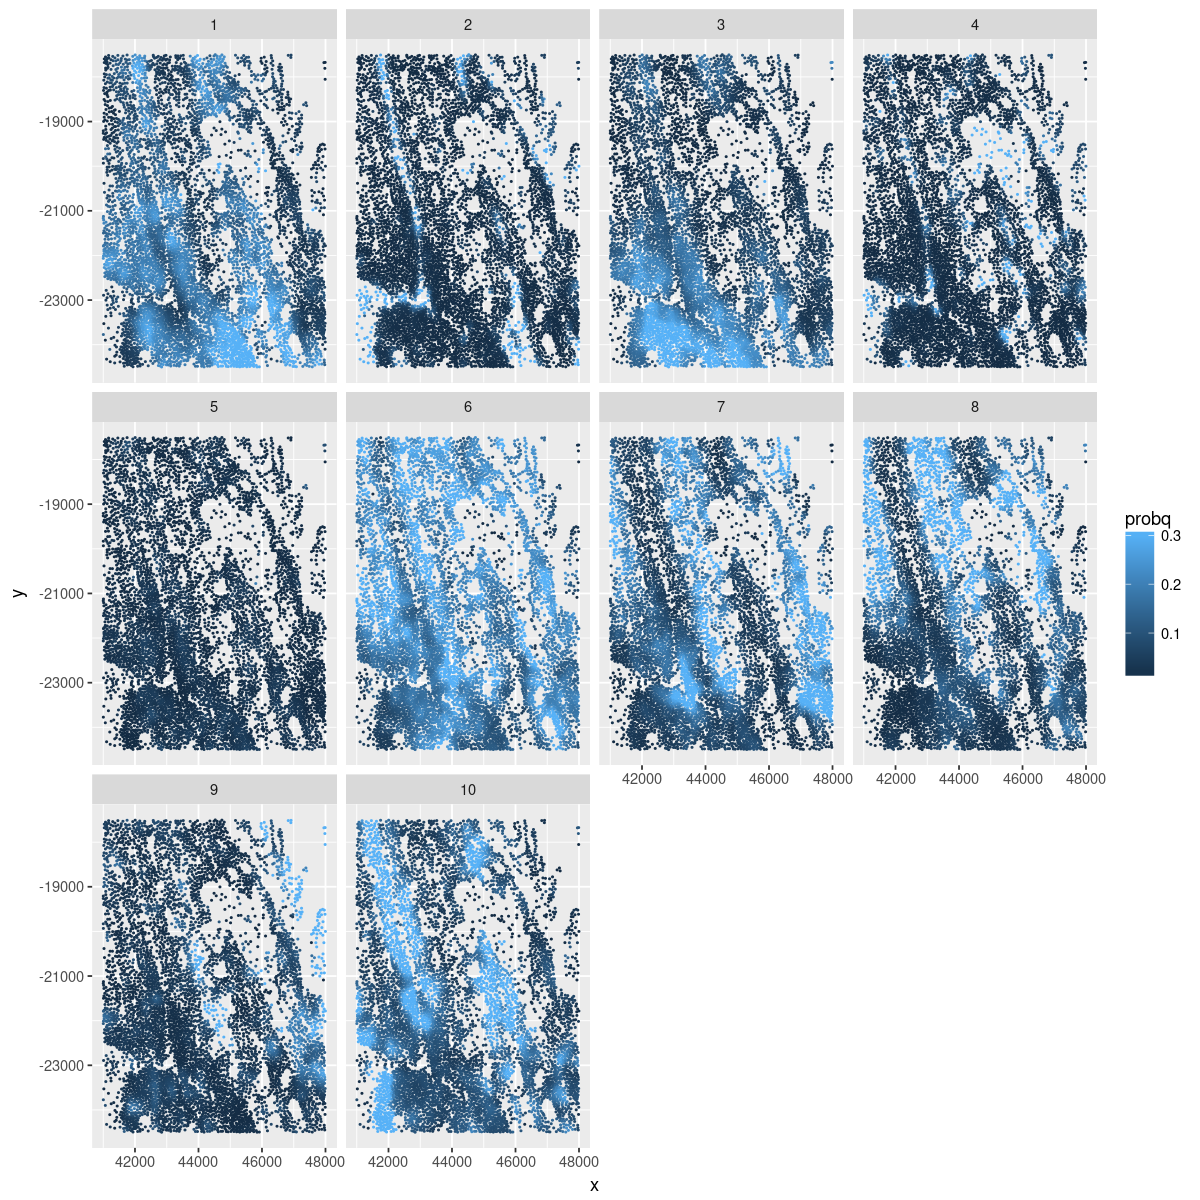

In [6]:
load("modelssaved/LH5K_f10_l0001.RData")

plotfactors(location,out$exposures)

# Regular NMF

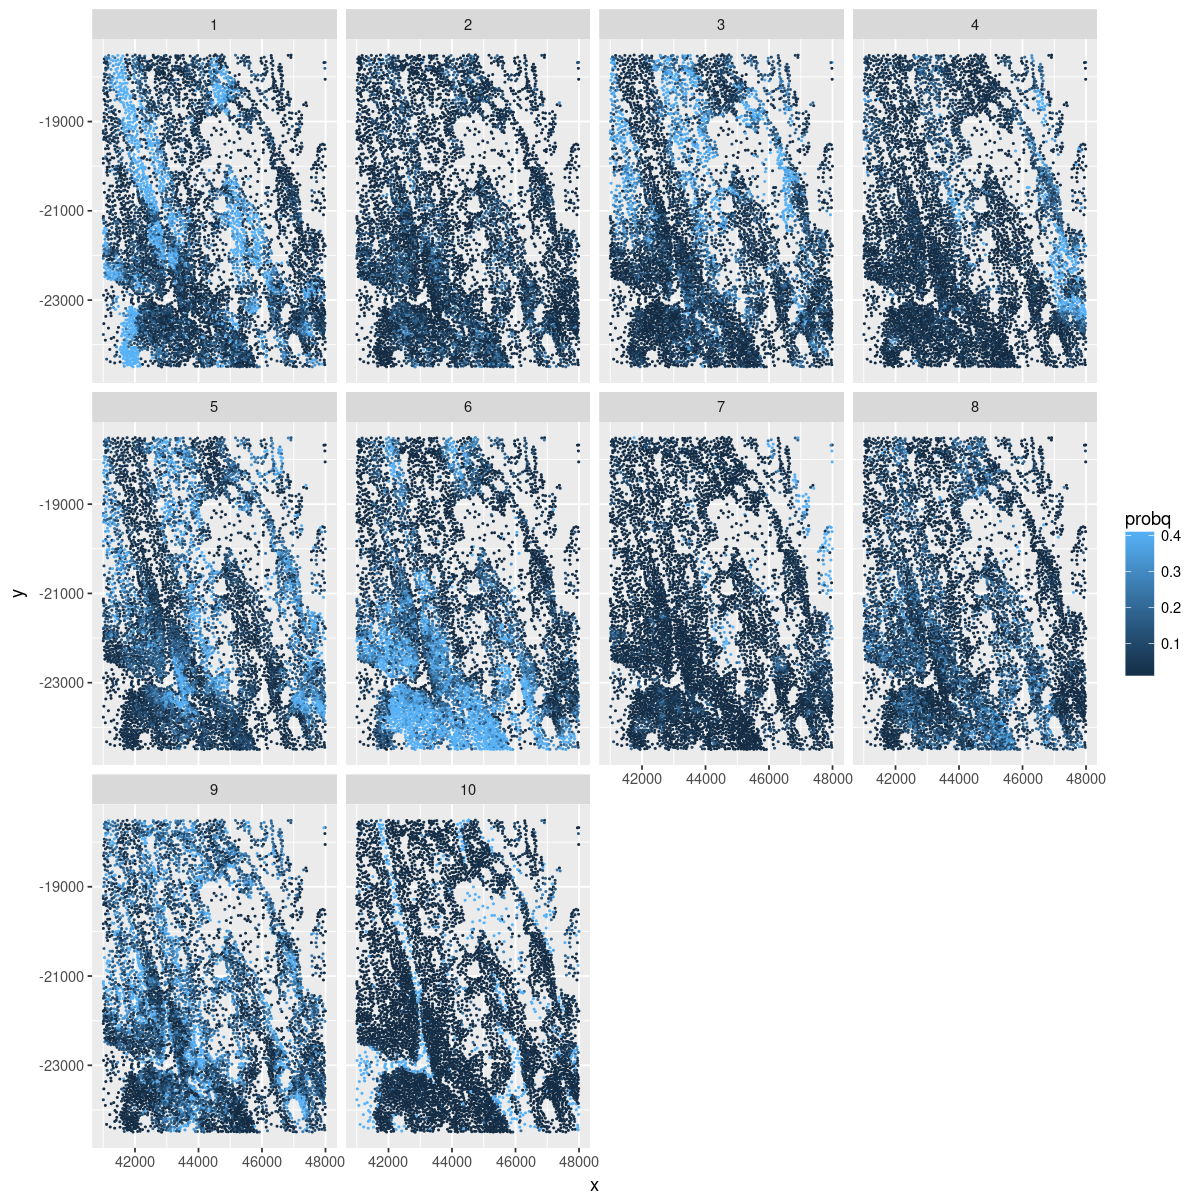

In [5]:
load("modelssaved/LH_f10_regnmf.RData")

plotfactors(location,out$exposures)